# NO3 Plate Processing

### upload

In [538]:
#install.packages('tibble')

In [539]:
library(readxl)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(purrr)

In [540]:
setwd('/Users/brookesienkiewicz/Documents/LabNotebook/Nutrients/')

In [541]:
# load plate raws 
raw <- read.table("plate_results/test_apr25_2025.txt",skip = 3, sep = '\t',fill=TRUE)
# can't figure out how to read in the txt file as is, so manually editing to remove unneccesary cols and rows

In [542]:
#suppressWarnings(raw)

In [543]:
# filter out unnecessary cols
raw<-raw %>%
    select(-c(1,2,15,16)) 

# and seperate plates into 2 dfs
raw1<-raw %>%
    slice_head(n=8)

raw2<-raw[c(13:20),]

In [544]:
options(scipen = 999)
options(digits = 5)  

In [545]:
letters[1:5]

[1] "a" "b" "c" "d" "e"

In [546]:
# store dfs in a list to apply all fxns to both 
raw <- list(raw1,raw2)

In [547]:
## data cleanup 
# fix colnames 

# make fxns
colname <- function(df) {
  colnames(df) <- seq(1:12)
  df
}

rowname <- function(df) {
  rownames(df) <- letters[1:8]
  df
}
# convert all to numeric 
raw <- map(raw, ~ data.frame(map(.x, as.numeric)))

#apply fxns 
raw <- lapply(raw, colname)
raw <- lapply(raw, rowname)

# seperate dfs 
raw1 <- raw[[1]]
raw2 <- raw[[2]]

In [548]:
raw

,1,2,3,4,5,6,7,8,9,10,11,12
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0.0758,0.0696,0.0733,0.0822,0.0940,0.0943,0.1020,0.1237,0.0651,0.0770,0.0772,0.0782
b,0.0678,0.0813,0.1077,0.1434,0.2274,0.4475,0.7830,0.8162,0.4516,0.0637,0.0652,0.0641
c,0.0680,0.4031,0.7271,1.3046,2.0966,1.4425,0.0706,0.1093,0.0739,0.0659,0.0658,0.0665
d,0.0753,0.0791,0.0744,0.0838,0.0771,0.0803,0.0773,0.0783,0.0771,0.0738,0.0734,0.0735
e,0.0874,0.0865,0.0862,0.1447,0.1441,0.1500,0.0733,0.0732,0.8000,0.4571,0.1087,0.0755
f,0.0695,0.0671,0.0660,0.0685,0.0687,0.0689,0.0722,0.0650,0.8201,0.4570,0.1089,0.0726
g,0.0751,0.0724,0.0744,0.0789,0.0847,0.0915,0.1011,0.0661,0.1102,0.3978,0.7355,1.3216
h,0.0738,0.0856,0.1113,0.1462,0.2295,0.4471,0.7945,0.0670,0.0692,2.0516,1.3343,0.0787
,1,2,3,4,5,6,7,8,9,10,11,12


## Standard Test - processing 
this standards test plate was run on 4/11
- 5x **extra low (0 - 0.05 ppm)**
- 4x **standards (0 - 1 ppm)**
- 4x high **standards (0-10ppm)**
- 7x filter blank wells
    - plate 1 B 9:11, F8
    - plate 2 F-H 12
- 3 reps of 4 QC checks using ERA standard
- 6x DI
- 16 samples (3x each)
- 5x Halka's cocrystal (5 dilutions, 3x each)

In [549]:
# upload plate set up 
plate_setup <- read_excel('plate_maps/SampleMap_4_24_2025.xlsx') %>% select(-1)
# %>% select(-1) %>% select(-13)%>% slice(1:8)

New names:
• `` -> `...1`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`


In [550]:
plate_setup1 <-plate_setup %>% select(1:12)%>% slice(1:8)
plate_setup2 <-plate_setup %>% select(1:12)%>% slice(11:18)

In [551]:
## data cleanup 
plate_setup1<-as.data.frame(plate_setup1)
plate_setup2<-as.data.frame(plate_setup2)

rownames(plate_setup1) <- letters[1:8]
rownames(plate_setup2) <- letters[1:8]

In [552]:
plate_setup1

,1,2,3,4,5,6,7,8,9,10,11,12
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
a,LOW 1,LOW 1.5,LOW 2,LOW 3,LOW 4,LOW 5,LOW 6,LOW 7,DI,cocrystal1,cocrystal1,cocrystal1
b,Std 1,Std 2,Std 3,Std 4,Std 5,Std 6,Std 7,QC1,QC2,blank,blank,blank
c,Hi 1,Hi 2,Hi 3,Hi 4,Hi 5,Hi 6,cocrystal6,QC3,QC4,N155,N155,N155
d,N148,N148,N148,N128,N128,N128,N124,N124,N124,N445,N445,N445
e,N489,N489,N489,N478,N478,N478,cocrystal2,cocrystal2,QC1,QC2,QC3,QC4
f,N173,N173,N173,N159,N159,N159,cocrystal2,blank,QC1,QC2,QC3,QC4
g,LOW 1,LOW 1.5,LOW 2,LOW 3,LOW 4,LOW 5,LOW 6,LOW 7,Hi 1,Hi 2,Hi 3,Hi 4
h,Std 1,Std 2,Std 3,Std 4,Std 5,Std 6,Std 7,DI,DI,Hi 5,Hi 6,cocrystal6


### Low 

#### add data 

In [553]:
low <- data.frame(id = unlist(plate_setup1[1, 1:8]),
                    conc = c(0,0.002,0.005,0.01,0.02,0.03,0.04,0.05),
                  # plate 1
                    od = unlist(raw1['a', 1:8]),
                    od2 = unlist(raw1['e', 1:8]),
                  # plate 2
                    od3 = unlist(raw2['a',1:8]),
                    od4 = unlist(raw2['g',1:8]),
                    od5 = unlist(raw2['h',1:8])
                 )
low

,id,conc,od,od2,od3,od4,od5
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOW 1,0.000,0.0758,0.0874,0.0764,0.0739,0.0741
2,LOW 1.5,0.002,0.0696,0.0865,0.0720,0.0731,0.0752
3,LOW 2,0.005,0.0733,0.0862,0.0738,0.0739,0.0776
4,LOW 3,0.010,0.0822,0.1447,0.0774,0.0801,0.0770
5,LOW 4,0.020,0.0940,0.1441,0.0884,0.0904,0.0901
6,LOW 5,0.030,0.0943,0.1500,0.0944,0.0969,0.0944
7,LOW 6,0.040,0.1020,0.0733,0.1024,0.1025,0.1053
8,LOW 7,0.050,0.1237,0.0732,0.1234,0.1215,0.1276


In [554]:
# check character types (all need to be numeric to run model)
str(low)

'data.frame':	8 obs. of  7 variables:
 $ id  : chr  "LOW 1" "LOW 1.5" "LOW 2" "LOW 3" ...
 $ conc: num  0 0.002 0.005 0.01 0.02 0.03 0.04 0.05
 $ od  : num  0.0758 0.0696 0.0733 0.0822 0.094 ...
 $ od2 : num  0.0874 0.0865 0.0862 0.1447 0.1441 ...
 $ od3 : num  0.0764 0.072 0.0738 0.0774 0.0884 ...
 $ od4 : num  0.0739 0.0731 0.0739 0.0801 0.0904 ...
 $ od5 : num  0.0741 0.0752 0.0776 0.077 0.0901 ...


In [555]:
# convert concentration to numeric 
# low$conc <- as.numeric(as.character(low$conc))

In [556]:
# calculate avg, standard deviation  and pivot 
low$avg_od <- rowMeans(low[, c("od", "od2", "od3","od4","od5")])

# pivot
low_long<-low %>% pivot_longer(cols = c("od", "od2", "od3","od4","od5"),
             names_to = 'rep',
             values_to = 'od')
# std dev
low_long <- low_long %>%
  group_by(id) %>%
  mutate(sd = sd(od)) %>%
  ungroup()

In [557]:
low_long %>%
  distinct(id, .keep_all = TRUE)

id,conc,avg_od,rep,od,sd
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
LOW 1,0.000,0.07752,od,0.0758,0.0056265
LOW 1.5,0.002,0.07528,od,0.0696,0.0065892
LOW 2,0.005,0.07696,od,0.0733,0.0054436
LOW 3,0.010,0.09228,od,0.0822,0.0293799
LOW 4,0.020,0.10140,od,0.0940,0.0239569
LOW 5,0.030,0.10600,od,0.0943,0.0246212
LOW 6,0.040,0.09710,od,0.1020,0.0133692
LOW 7,0.050,0.11388,od,0.1237,0.0228486


### Standard curve

In [558]:
# create linear standard curve 
# lm(target(y) ~ predictor(x))
# normally concentration is predictor (x), absorbance is response variable (y)
# but since we need to predict concentration, switching variables. since they are a linear relationship this should be fine. 
# SO: conc ~ od means absorbance is predictor (x) and concentration is response (y)
low_model <- lm(conc ~ od, data = low_long)
# view summary stats (R-squared)
summary(low_model)


Call:
lm(formula = conc ~ od, data = low_long)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.03326 -0.01011 -0.00337  0.01081  0.03914 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.0223     0.0103   -2.18  0.03583 *  
od            0.4531     0.1079    4.20  0.00015 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0148 on 38 degrees of freedom
Multiple R-squared:  0.317,	Adjusted R-squared:  0.299 
F-statistic: 17.7 on 1 and 38 DF,  p-value: 0.000155


In [559]:
## use the averages for the curve 
low_avg_model <- lm(conc ~ avg_od, data = low_long)
summary(low_avg_model)


Call:
lm(formula = conc ~ avg_od, data = low_long)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.009717 -0.006051 -0.000201  0.003882  0.015188 

Coefficients:
            Estimate Std. Error t value           Pr(>|t|)    
(Intercept)  -0.0859     0.0087   -9.88 0.0000000000047815 ***
avg_od        1.1406     0.0930   12.27 0.0000000000000087 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.00806 on 38 degrees of freedom
Multiple R-squared:  0.798,	Adjusted R-squared:  0.793 
F-statistic:  150 on 1 and 38 DF,  p-value: 0.00000000000000873


In [560]:
aic <- AIC(low_model, low_avg_model)
aic
# non-avg is better, but avg has higher R2

,df,AIC
,<dbl>,<dbl>
low_model,3,-219.42
low_avg_model,3,-268.22


`geom_smooth()` using formula = 'y ~ x'


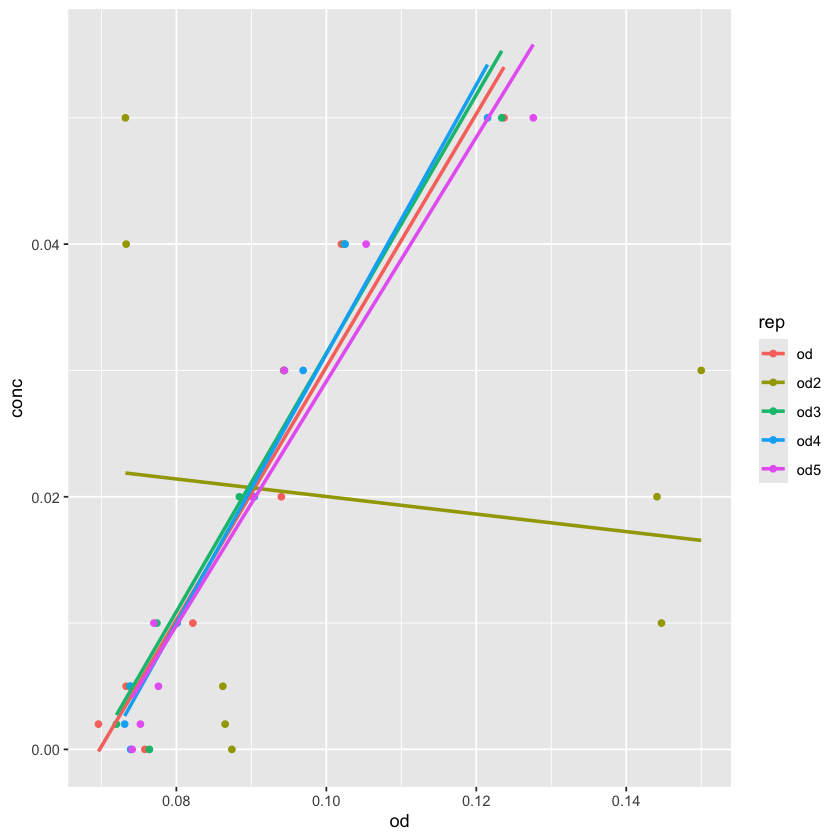

In [561]:
# Plot the data with the regression line
ggplot(low_long, aes(x = od, y = conc, color = rep)) +
       geom_point() +
       geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula = 'y ~ x'


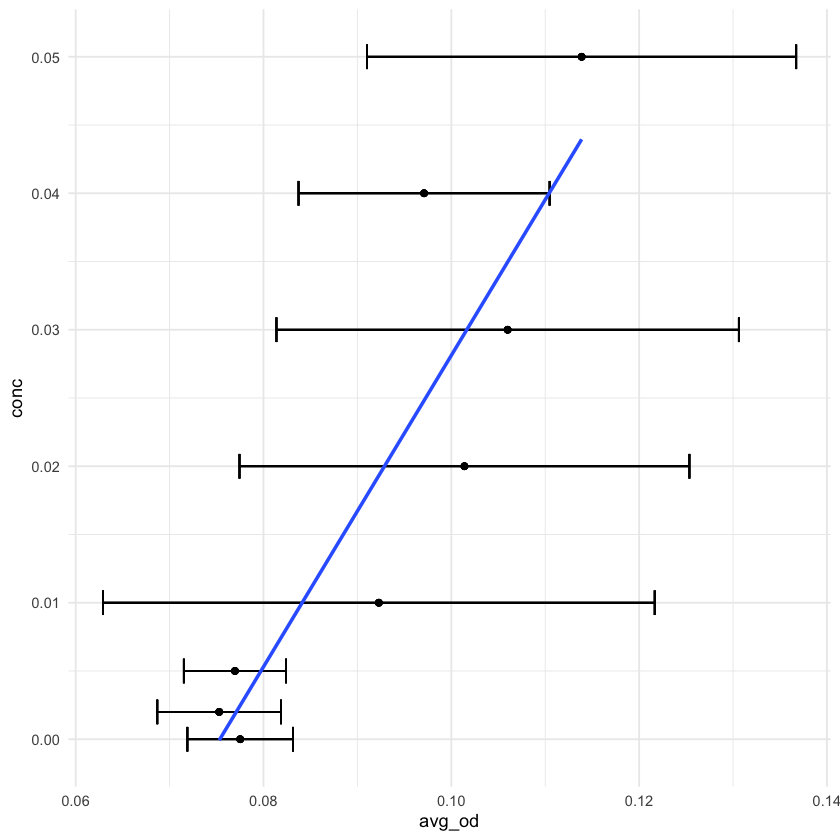

In [562]:
ggplot(low_long, aes(x = avg_od, y = conc)) + 
  geom_point() +  # Plot the average OD
  geom_errorbarh(aes(xmin = avg_od - sd, xmax = avg_od + sd)) +  # Add horizontal error bars
  geom_smooth(method = "lm", se = FALSE, linetype = "solid") +  # Add regression line
  theme_minimal()

In [563]:
# remove od 2
low_long<-low_long %>%
    filter(!rep=='od2')

# rerun lm 
low_model <- lm(conc ~ od, data = low_long)
summary(low_model)

low_avg_model <- lm(conc ~ avg_od, data = low_long)
summary(low_avg_model)

AIC(low_model, low_avg_model)


Call:
lm(formula = conc ~ od, data = low_long)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.008364 -0.003574 -0.000262  0.002693  0.007511 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept) -0.07060    0.00413   -17.1 <0.0000000000000002 ***
od           1.01071    0.04548    22.2 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.00432 on 30 degrees of freedom
Multiple R-squared:  0.943,	Adjusted R-squared:  0.941 
F-statistic:  494 on 1 and 30 DF,  p-value: <0.0000000000000002



Call:
lm(formula = conc ~ avg_od, data = low_long)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.009717 -0.006051 -0.000201  0.003882  0.015188 

Coefficients:
            Estimate Std. Error t value        Pr(>|t|)    
(Intercept) -0.08594    0.00979   -8.78 0.0000000008690 ***
avg_od       1.14063    0.10465   10.90 0.0000000000059 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.00811 on 30 degrees of freedom
Multiple R-squared:  0.798,	Adjusted R-squared:  0.792 
F-statistic:  119 on 1 and 30 DF,  p-value: 0.00000000000593


,df,AIC
,<dbl>,<dbl>
low_model,3,-253.66
low_avg_model,3,-213.38


`geom_smooth()` using formula = 'y ~ x'


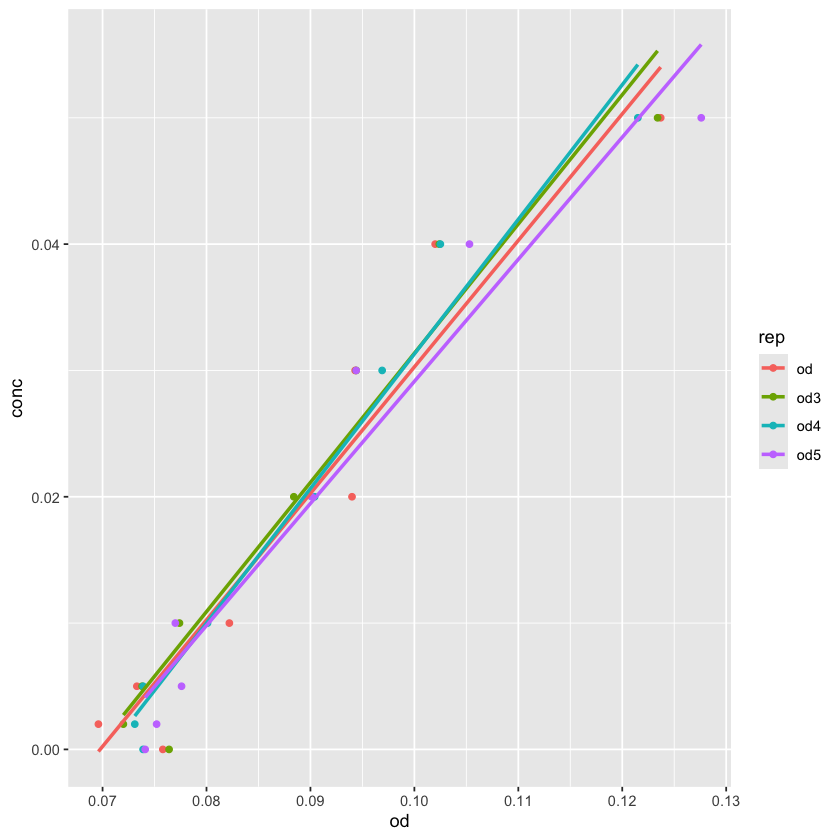

In [564]:
# Plot the data with the regression line
ggplot(low_long, aes(x = od, y = conc, color = rep)) +
       geom_point() +
       geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula = 'y ~ x'


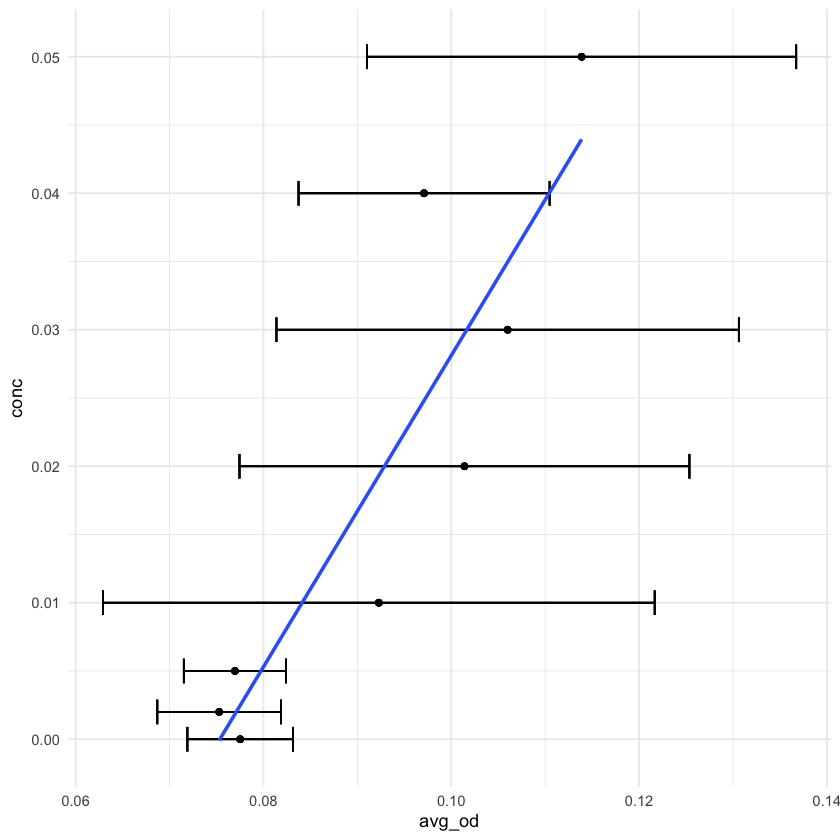

In [565]:
ggplot(low_long, aes(x = avg_od, y = conc)) + 
  geom_point() +  # Plot the average OD
  geom_errorbarh(aes(xmin = avg_od - sd, xmax = avg_od + sd)) +  # Add horizontal error bars
  geom_smooth(method = "lm", se = FALSE, linetype = "solid") +  # Add regression line
  theme_minimal()

### High

In [566]:
# add high curve

# high
# plate1 - c 1:6
        # - g 9:12
        # - h 10:11
# plate 2 - e 1:6
        # - a 9:12
        # - b 9:10

In [567]:
hi <- data.frame(id = unlist(plate_setup1['c', 1:6]),
                    conc = c(0,0.05,1,2,5,10),
                 # plate 1 
                    od = unlist(raw1['c', 1:6]),
                    od2 = c(unlist(raw1['g', 9:12]), unlist(raw1['h', 10:11])),
                 # plate 2
                    od3 = unlist(raw2['e', 1:6]),
                    od4 = c(unlist(raw2['a', 9:12]), unlist(raw2['b', 9:10]))
)

hi

,id,conc,od,od2,od3,od4
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Hi 1,0.00,0.0680,0.1102,0.0706,0.0697
2,Hi 2,0.05,0.4031,0.3978,0.4059,0.4196
3,Hi 3,1.00,0.7271,0.7355,0.7066,0.7226
4,Hi 4,2.00,1.3046,1.3216,1.3574,1.3625
5,Hi 5,5.00,2.0966,2.0516,2.0121,1.9883
6,Hi 6,10.00,1.4425,1.3343,1.4808,1.7696


In [568]:
# calculate avg, standard deviation  and pivot 
hi$avg_od <- rowMeans(hi[, c("od", "od2","od3","od4")])

# pivot
hi_long<-hi %>% pivot_longer(cols = c("od", "od2","od3","od4"),
             names_to = 'rep',
             values_to = 'od')
# std dev
hi_long <- hi_long %>%
  group_by(id) %>%
  mutate(sd = sd(od)) %>%
  ungroup()

In [569]:
head(hi_long)

id,conc,avg_od,rep,od,sd
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Hi 1,0.00,0.079625,od,0.0680,0.0204118
Hi 1,0.00,0.079625,od2,0.1102,0.0204118
Hi 1,0.00,0.079625,od3,0.0706,0.0204118
Hi 1,0.00,0.079625,od4,0.0697,0.0204118
Hi 2,0.05,0.406600,od,0.4031,0.0092948
Hi 2,0.05,0.406600,od2,0.3978,0.0092948


#### Standard curve

In [570]:
# create linear standard curve 
# lm(target(y) ~ predictor(x))
# normally concentration is predictor (x), absorbance is response variable (y)
# but since we need to predict concentration, switching variables. since they are a linear relationship this should be fine. 
# SO: conc ~ od means absorbance is predictor (x) and concentration is response (y)
hi_model <- lm(conc ~ od, data = hi_long)
# view summary stats (R-squared)
summary(hi_model)


Call:
lm(formula = conc ~ od, data = hi_long)

Residuals:
   Min     1Q Median     3Q    Max 
-2.317 -1.800 -0.782  0.548  5.789 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.813      0.951   -0.86      0.4    
od             3.765      0.779    4.83 0.000079 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.58 on 22 degrees of freedom
Multiple R-squared:  0.515,	Adjusted R-squared:  0.493 
F-statistic: 23.3 on 1 and 22 DF,  p-value: 0.0000794


In [571]:
## use the averages for the curve 
hi_avg_model <- lm(conc ~ avg_od, data = hi_long)
summary(hi_avg_model)


Call:
lm(formula = conc ~ avg_od, data = hi_long)

Residuals:
   Min     1Q Median     3Q    Max 
-2.232 -1.898 -0.771  0.550  5.120 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.853      0.949   -0.90     0.38    
avg_od         3.805      0.779    4.88  0.00007 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.57 on 22 degrees of freedom
Multiple R-squared:  0.52,	Adjusted R-squared:  0.498 
F-statistic: 23.9 on 1 and 22 DF,  p-value: 0.0000698


In [572]:
aic <- AIC(hi_model, hi_avg_model)
aic
# soo close for aic and r squared, so just use avg 

,df,AIC
,<dbl>,<dbl>
hi_model,3,117.59
hi_avg_model,3,117.32


`geom_smooth()` using formula = 'y ~ x'


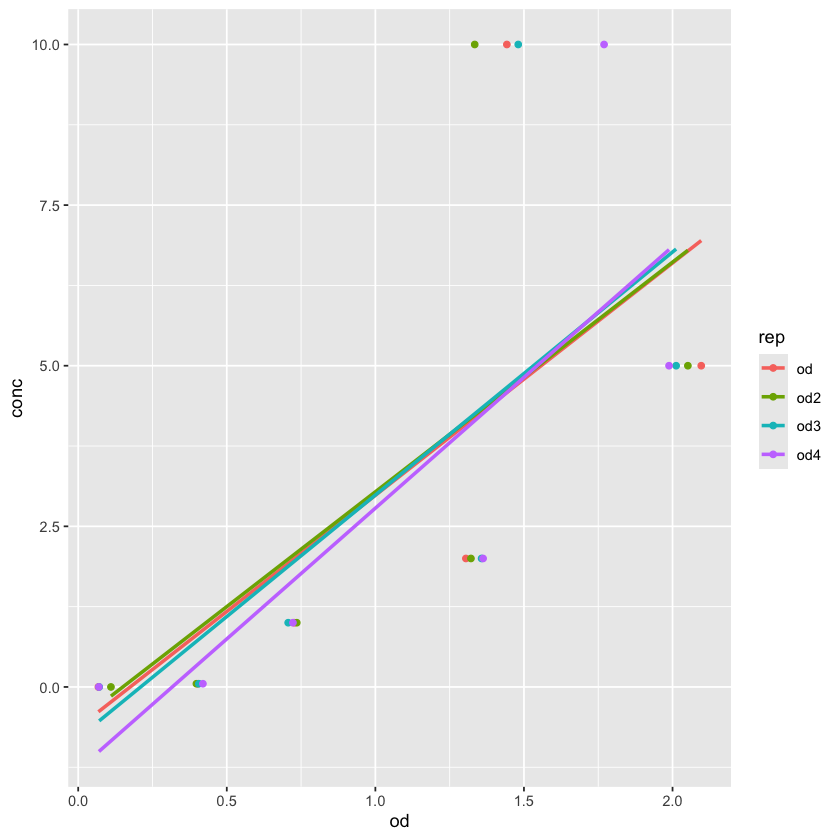

In [573]:
# Plot the data with the regression line
ggplot(hi_long, aes(x = od, y = conc, color = rep)) +
       geom_point() +
       geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula = 'y ~ x'


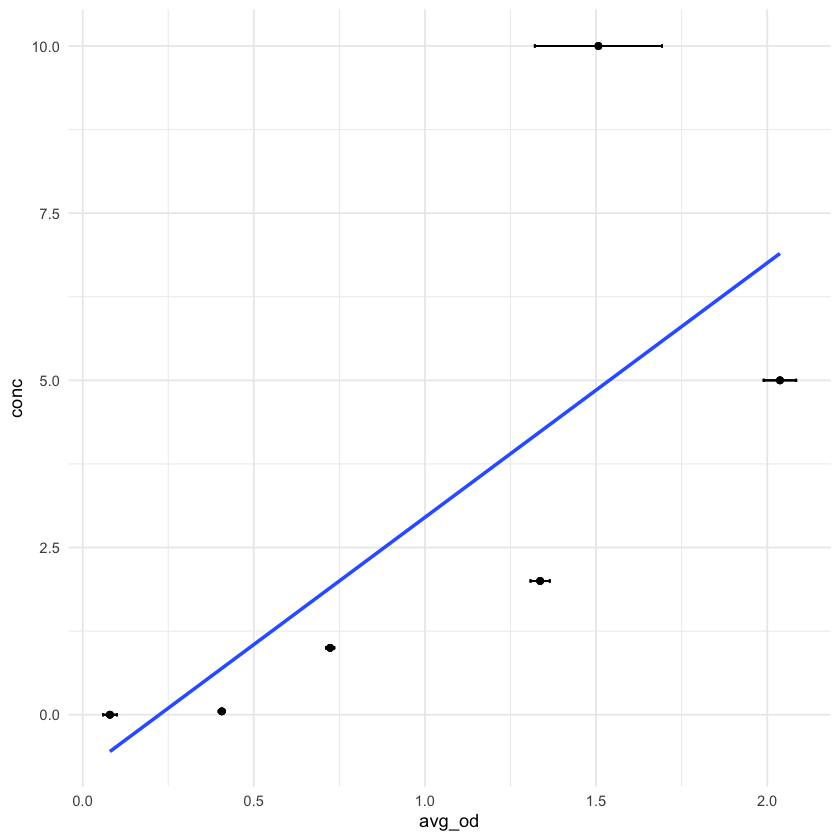

In [574]:
ggplot(hi_long, aes(x = avg_od, y = conc)) + 
  geom_point() +  # Plot the average OD
  geom_errorbarh(aes(xmin = avg_od - sd, xmax = avg_od + sd)) +  # Add horizontal error bars
  geom_smooth(method = "lm", se = FALSE, linetype = "solid") +  # Add regression line
  theme_minimal()

### stnd (mid) curve

In [575]:
# add standard (mid) curve 

mid <- data.frame(id = unlist(plate_setup1['b', 1:7]),
                    conc = c(0,0.02,0.05,0.1,0.2,0.5,1),
                   # plate 1
                    od = unlist(raw1['b', 1:7]),
                    od2 = unlist(raw1['h', 1:7]),
                   # plate 2
                    od3 = unlist(raw2['b', 1:7]),
                    od4 = unlist(raw2['f', 1:7])
                 )
mid

,id,conc,od,od2,od3,od4
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Std 1,0.00,0.0678,0.0738,0.0566,0.0718
2,Std 2,0.02,0.0813,0.0856,0.0721,0.0811
3,Std 3,0.05,0.1077,0.1113,0.0965,0.1038
4,Std 4,0.10,0.1434,0.1462,0.1315,0.1434
5,Std 5,0.20,0.2274,0.2295,0.2113,0.2293
6,Std 6,0.50,0.4475,0.4471,0.4151,0.4456
7,Std 7,1.00,0.7830,0.7945,0.7365,0.7692


In [576]:
# calculate avg, standard deviation  and pivot 
mid$avg_od <- rowMeans(mid[, c("od","od2","od3","od4")])

# pivot
mid_long<-mid %>% pivot_longer(cols = c("od", "od2","od3","od4"),
             names_to = 'rep',
             values_to = 'od')
# std dev
mid_long <- mid_long %>%
  group_by(id) %>%
  mutate(sd = sd(od)) %>%
  ungroup()

In [577]:
head(mid_long)

id,conc,avg_od,rep,od,sd
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Std 1,0.00,0.067500,od,0.0678,0.0076829
Std 1,0.00,0.067500,od2,0.0738,0.0076829
Std 1,0.00,0.067500,od3,0.0566,0.0076829
Std 1,0.00,0.067500,od4,0.0718,0.0076829
Std 2,0.02,0.080025,od,0.0813,0.0056765
Std 2,0.02,0.080025,od2,0.0856,0.0056765


#### Standard curve

In [578]:
# create linear standard curve 
# lm(target(y) ~ predictor(x))
# normally concentration is predictor (x), absorbance is response variable (y)
# but since we need to predict concentration, switching variables. since they are a linear relationship this should be fine. 
# SO: conc ~ od means absorbance is predictor (x) and concentration is response (y)
mid_model <- lm(conc ~ od, data = mid_long)
# view summary stats (R-squared)
summary(mid_model)


Call:
lm(formula = conc ~ od, data = mid_long)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.03005 -0.00930 -0.00055  0.00872  0.06239 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept) -0.10102    0.00554   -18.2  0.00000000000000024 ***
od           1.41022    0.01562    90.3 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0198 on 26 degrees of freedom
Multiple R-squared:  0.997,	Adjusted R-squared:  0.997 
F-statistic: 8.15e+03 on 1 and 26 DF,  p-value: <0.0000000000000002


In [579]:
## use the averages for the curve 
mid_avg_model <- lm(conc ~ avg_od, data = mid_long)
summary(mid_avg_model)


Call:
lm(formula = conc ~ avg_od, data = mid_long)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.01835 -0.01529  0.00366  0.00871  0.01250 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept) -0.10180    0.00322   -31.6 <0.0000000000000002 ***
avg_od       1.41320    0.00909   155.5 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0115 on 26 degrees of freedom
Multiple R-squared:  0.999,	Adjusted R-squared:  0.999 
F-statistic: 2.42e+04 on 1 and 26 DF,  p-value: <0.0000000000000002


In [580]:
aic <- AIC(mid_model, mid_avg_model)
aic
# soo close for aic and r squared, so just use avg 

,df,AIC
,<dbl>,<dbl>
mid_model,3,-136.18
mid_avg_model,3,-166.58


`geom_smooth()` using formula = 'y ~ x'


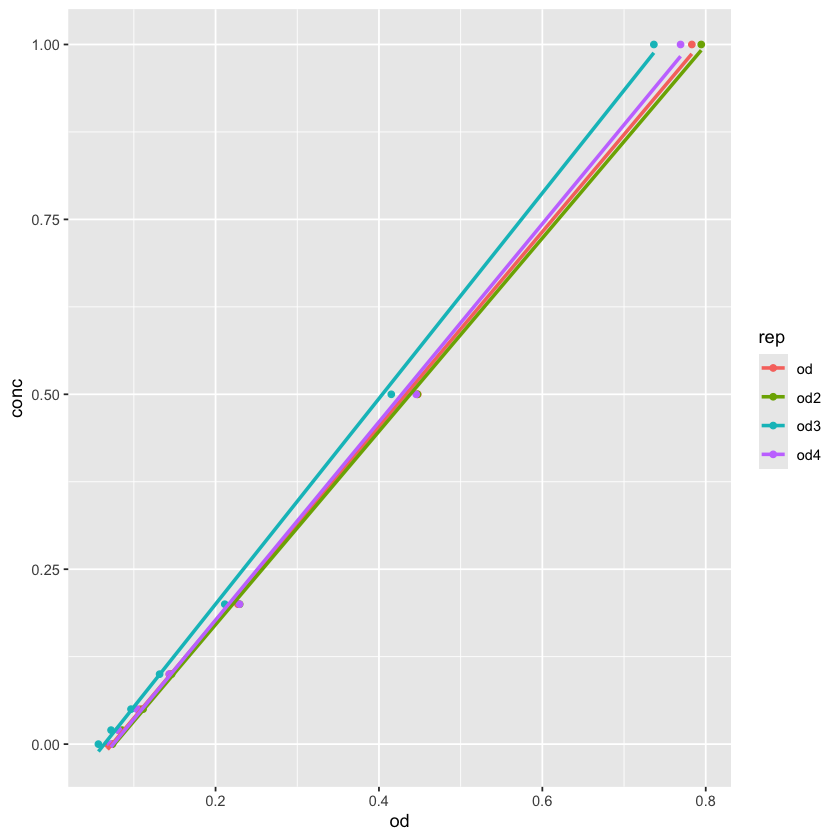

In [581]:
# Plot the data with the regression line
ggplot(mid_long, aes(x = od, y = conc, color = rep)) +
       geom_point() +
       geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula = 'y ~ x'


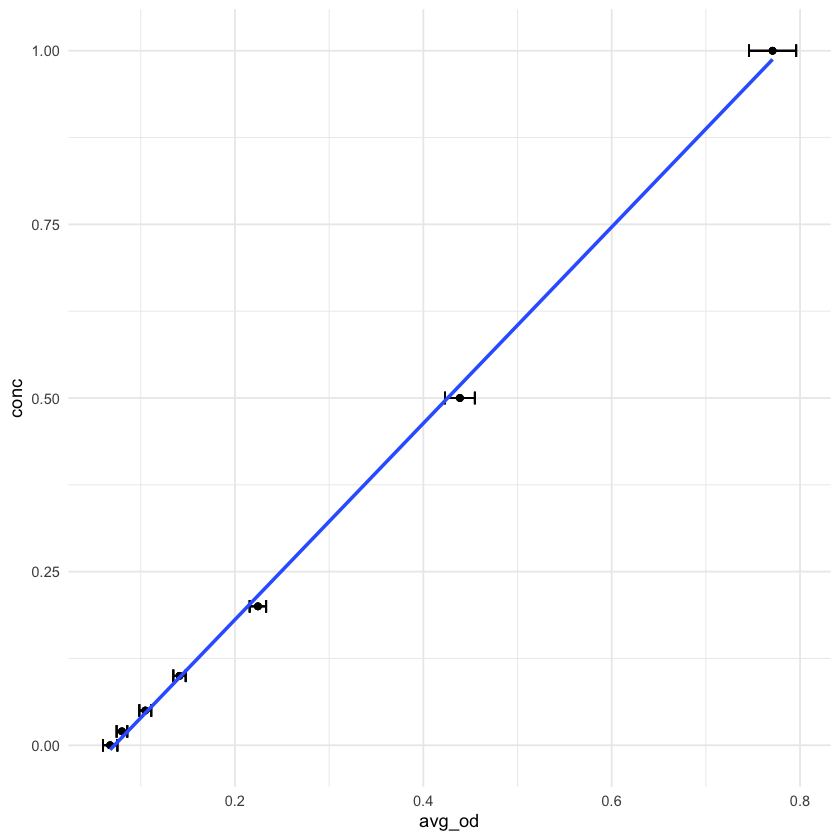

In [582]:
ggplot(mid_long, aes(x = avg_od, y = conc)) + 
  geom_point() +  # Plot the average OD
  geom_errorbarh(aes(xmin = avg_od - sd, xmax = avg_od + sd)) +  # Add horizontal error bars
  geom_smooth(method = "lm", se = FALSE, linetype = "solid") +  # Add regression line
  theme_minimal()

### Combined 

In [583]:
# merge rows 
stnds<-bind_rows(hi_long, low_long,mid_long)

head(stnds)

id,conc,avg_od,rep,od,sd
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Hi 1,0.00,0.079625,od,0.0680,0.0204118
Hi 1,0.00,0.079625,od2,0.1102,0.0204118
Hi 1,0.00,0.079625,od3,0.0706,0.0204118
Hi 1,0.00,0.079625,od4,0.0697,0.0204118
Hi 2,0.05,0.406600,od,0.4031,0.0092948
Hi 2,0.05,0.406600,od2,0.3978,0.0092948


In [584]:
# recalculate averages 
stnds<-stnds %>% 
    group_by(conc) %>% 
        mutate(avg_od = mean(od))

In [585]:
# create linear standard curve 
# lm(target(y) ~ predictor(x))
# normally concentration is predictor (x), absorbance is response variable (y)
# but since we need to predict concentration, switcstndsng variables. since they are a linear relationsstndsp tstndss should be fine. 
# SO: conc ~ od means absorbance is predictor (x) and concentration is response (y)
stnds_model <- lm(conc ~ od, data = stnds)
# view summary stats (R-squared)
summary(stnds_model)


Call:
lm(formula = conc ~ od, data = stnds)

Residuals:
   Min     1Q Median     3Q    Max 
-2.187 -0.579  0.133  0.187  5.908 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept)   -0.440      0.188   -2.34               0.022 *  
od             3.396      0.275   12.37 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.38 on 82 degrees of freedom
Multiple R-squared:  0.651,	Adjusted R-squared:  0.647 
F-statistic:  153 on 1 and 82 DF,  p-value: <0.0000000000000002


In [586]:
## use the averages for the curve 
stnds_avg_model <- lm(conc ~ avg_od, data = stnds)
summary(stnds_avg_model)


Call:
lm(formula = conc ~ avg_od, data = stnds)

Residuals:
   Min     1Q Median     3Q    Max 
-2.144 -0.220  0.145  0.204  5.270 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept)   -0.459      0.186   -2.47               0.016 *  
avg_od         3.444      0.273   12.62 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.36 on 82 degrees of freedom
Multiple R-squared:  0.66,	Adjusted R-squared:  0.656 
F-statistic:  159 on 1 and 82 DF,  p-value: <0.0000000000000002


#### without high stnd 

In [587]:
stnds<-bind_rows(low_long,mid_long)
# recalculate averages 
stnds<-stnds %>% 
    group_by(conc) %>% 
        mutate(avg_od = mean(od))

# rerun lm
stnds_model <- lm(conc ~ od, data = stnds)
summary(stnds_model)

stnds_avg_model <- lm(conc ~ avg_od, data = stnds)
summary(stnds_avg_model)


Call:
lm(formula = conc ~ od, data = stnds)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.02858 -0.00329  0.00026  0.00531  0.06248 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept) -0.10463    0.00258   -40.6 <0.0000000000000002 ***
od           1.41500    0.01026   137.9 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0147 on 58 degrees of freedom
Multiple R-squared:  0.997,	Adjusted R-squared:  0.997 
F-statistic: 1.9e+04 on 1 and 58 DF,  p-value: <0.0000000000000002



Call:
lm(formula = conc ~ avg_od, data = stnds)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.01716 -0.00713  0.00409  0.00430  0.01205 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept) -0.10516    0.00134   -78.5 <0.0000000000000002 ***
avg_od       1.41815    0.00534   265.5 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.00766 on 58 degrees of freedom
Multiple R-squared:  0.999,	Adjusted R-squared:  0.999 
F-statistic: 7.05e+04 on 1 and 58 DF,  p-value: <0.0000000000000002


`geom_smooth()` using formula = 'y ~ x'


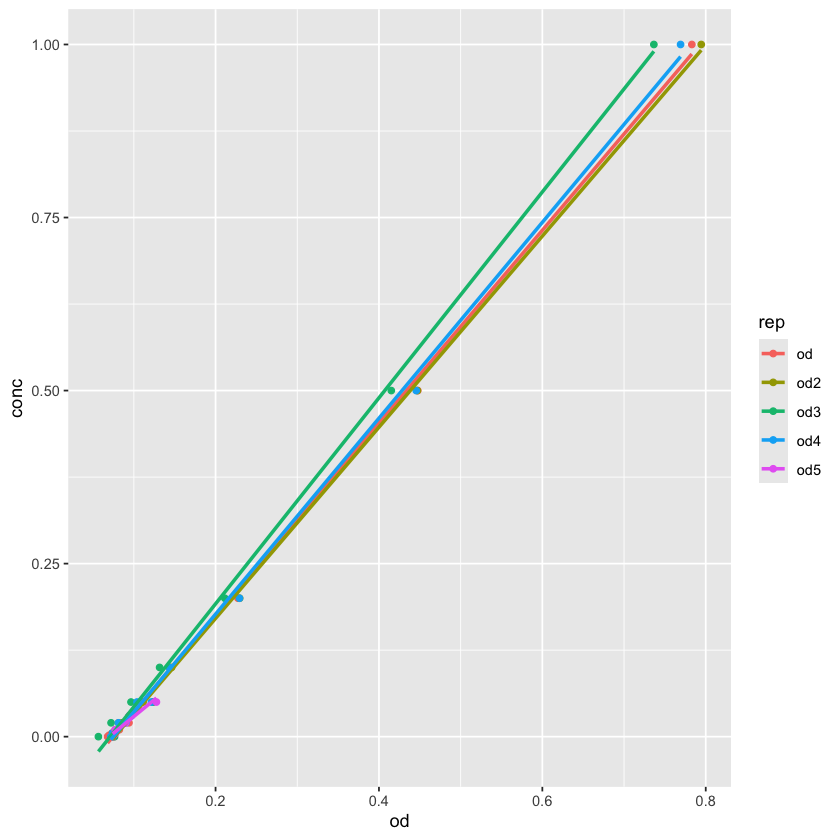

In [588]:
# Plot the data with the regression line
ggplot(stnds, aes(x = od, y = conc, color = rep)) +
       geom_point() +
       geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula = 'y ~ x'


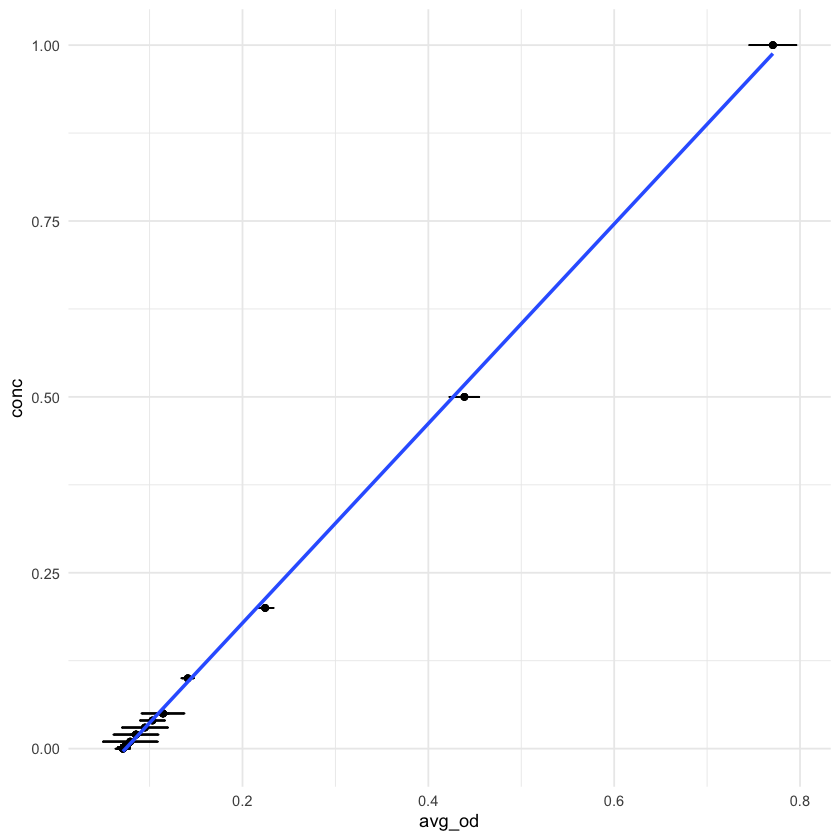

In [589]:
ggplot(stnds, aes(x = avg_od, y = conc)) + 
  geom_point() +  # Plot the average OD
  geom_errorbarh(aes(xmin = avg_od - sd, xmax = avg_od + sd)) +  # Add horizontal error bars
  geom_smooth(method = "lm", se = FALSE, linetype = "solid") +  # Add regression line
  theme_minimal()

In [590]:
aic <- AIC(stnds_model, stnds_avg_model, hi_model, hi_avg_model, mid_model, mid_avg_model, low_model, low_avg_model)
aic
# yay combined is better than low model alone
# using avg since thats what typically is used and the adjusted r squared is 0.999

Warning message in AIC.default(stnds_model, stnds_avg_model, hi_model, hi_avg_model, :
“models are not all fitted to the same number of observations”


,df,AIC
,<dbl>,<dbl>
stnds_model,3,-331.90
stnds_avg_model,3,-410.41
hi_model,3,117.59
hi_avg_model,3,117.32
mid_model,3,-136.18
mid_avg_model,3,-166.58
low_model,3,-253.66
low_avg_model,3,-213.38


In [591]:
# get r squared values 
# make list of curves (linear models)
curves<-c('stnds_model','stnds_avg_model','hi_model','hi_avg_model','mid_model','mid_avg_model','low_model','low_avg_model')

set_names(curves) |>
  map_dbl(~ summary(get(.x))$adj.r.squared)
# all stnds avg looks the best - continue using this one 

stnds_model stnds_avg_model        hi_model    hi_avg_model       mid_model 
        0.99691         0.99916         0.49272         0.49839         0.99670 
  mid_avg_model       low_model   low_avg_model 
        0.99888         0.94084         0.79167

## Samples and QC from curves

### add data 

In [592]:
# pull out sample data (samples, QCs, blanks) and use stnd curve to calculate concentrations

In [593]:
# 15 samples
# plate 1
s155 <- raw1[c("c"),10:12] %>% 
    mutate(sample = 's155') 
s148 <- raw1[c("d"),1:3] %>% 
    mutate(sample = 's148') 
s128 <- raw1[c("d"),4:6] %>% 
    mutate(sample = 's128') 
s124 <- raw1[c("d"),7:9] %>% 
    mutate(sample = 's128') 
s445 <- raw1[c("d"),10:12] %>% 
    mutate(sample = 's445') 
s489 <- raw1[c("e"),1:3] %>% 
    mutate(sample = 's489') 
s478 <- raw1[c("e"),4:6] %>% 
    mutate(sample = 's478') 
s173 <- raw1[c("f"),1:3] %>% 
    mutate(sample = 's173') 
s159 <- raw1[c("f"),4:6] %>% 
    mutate(sample = 's159') 


# plate2 
s123 <- raw2[c("c"),4:6] %>%
    mutate(sample = 's123')
s262 <- raw2[c("c"),7:9] %>%
    mutate(sample = 's262')
s428 <- raw2[c("c"),10:12] %>%
    mutate(sample = 's428')
s256 <- raw2[c("d"),1:3] %>%
    mutate(sample = 's256')
s457 <- raw2[c("d"),4:6] %>%
    mutate(sample = 's457')
s273 <- raw2[c("d"),7:9] %>%
    mutate(sample = 's273')
s162 <- raw2[c("g"),9:11] %>%
    mutate(sample = 's162')



# cocrystals 
u1 <- raw2[c("a"),10:12] %>%
    mutate(sample = 'u1')
u2 <- data.frame(id = c(raw1["e", 7:8], raw1["f", 7])) %>%
  mutate(sample = "u2")
u6 <- data.frame(od = unlist(c(raw1["c", 7], raw1["h", 12], raw2["e", 7], raw2["b", 11]))) %>%
  mutate(sample = "u6",
        rep = as.character(seq(1:4)))

u3<- raw2[c("a"),10:12] %>%
    mutate(sample = 'u3')
u4<- raw2[c("d"),10:12] %>%
    mutate(sample = 'u4')
u5<- raw2[c("d"),9:11] %>%
    mutate(sample = 'u5')


# make list of sample dfs 
sample_list <-list(s155,s148,s128,s124,s445,s489,s478,s173,
                  s159,s123,s262,s428,s256,s457,s273,s162,
                   u1,u2,u3,u4,u5)
# u6 needs to be separate since there are 4 cols

In [594]:
# rename cols so they all match 
sample_list <- map(sample_list, ~ set_names(.x, c("1", "2", "3", "sample")))

In [595]:
# combine and pivot
samples <- bind_rows(sample_list) %>%
    pivot_longer(cols = 1:3,
                names_to = 'rep',
                 values_to = 'od')
# add u6 
samples <- bind_rows(samples, u6)
tail(samples)

sample,rep,od
<chr>,<chr>,<dbl>
u5,2,0.0791
u5,3,0.0817
u6,1,0.0706
u6,2,0.0787
u6,3,0.0676
u6,4,0.0708


In [596]:
# QC1 (1ppm): A,B,E,F 9 & C7 
# QC2 (0.5 ppm): A,B,E,F 10 & D7 
# QC3 (0.05 ppm): A,B,E,F 11 & C8
# QC4 (0.005 ppm): A,B,E,F 12 & D8

qc1 <- data.frame(
  rep = c(1, 2, 3, 4, 5),
  od = c(raw1["b", 8], raw1["e", 9], raw1["f", 9], raw2["e", 8], raw2["f", 8]), 
  sample = "qc1"
)

qc2 <- data.frame(
  rep = c(1, 2, 3, 4, 5),
  od = c(raw1["b", 9], raw1["e", 10], raw1["f", 10], raw2["e", 9], raw2["f", 9]),
  sample = "qc2" 
)

qc3 <- data.frame(
  rep = c(1, 2, 3, 4, 5), 
  od = c(raw1["c", 8], raw1["e", 11], raw1["f", 11], raw2["e", 10], raw2["f", 10]), 
  sample = "qc3" 
)

qc4 <- data.frame(
  rep = c(1, 2, 3, 4, 5), 
  od = c(raw1["c", 9], raw1["e", 12], raw1["f", 12], raw2["e", 11], raw2["f", 11]), 
  sample = "qc4" 
)

# Combine
qc_long <- bind_rows(qc1, qc2, qc3, qc4)
head(qc_long)

,rep,od,sample
,<dbl>,<dbl>,<chr>
1,1,0.8162,qc1
2,2,0.8000,qc1
3,3,0.8201,qc1
4,4,0.8859,qc1
5,5,0.8881,qc1
6,1,0.4516,qc2


In [597]:
# di blanks, 6 reps
di <- data.frame(
  rep = c(seq(1:6)),
  od = c(raw1["a", 9], raw1["h", 8], raw1["h", 9],
         raw2["b", 8], raw2["b", 12],raw2["e", 12]),
  sample = "di_blank"
)

# filter blanks, 7 blanks 
blank <- data.frame(
  rep = c(seq(1:7)),
  od = c(raw1["b", 10], raw1["b", 11],raw1["b", 12],raw1["f", 8], 
         raw2["f", 12], raw2["g", 12], raw2["h", 12]),
  sample = "filter_blank"
)
# combine 
blanks<-bind_rows(di,blank)
head(blanks)

,rep,od,sample
,<int>,<dbl>,<chr>
1,1,0.0651,di_blank
2,2,0.0670,di_blank
3,3,0.0692,di_blank
4,4,0.0696,di_blank
5,5,0.0701,di_blank
6,6,0.0706,di_blank


In [598]:
samples<-rbind(samples, qc_long)
samples<-rbind(samples, blanks)

In [599]:
samples <- samples %>%
    group_by(sample) %>%
    mutate(avg_od = mean(od)) %>% # Calculate mean within each group and add it as a new column
    mutate(sd_od = sd(od)) %>%
    ungroup() # Remove grouping for subsequent operations
samples

sample,rep,od,avg_od,sd_od
<chr>,<chr>,<dbl>,<dbl>,<dbl>
s155,1,0.0659,0.066067,0.00037859
s155,2,0.0658,0.066067,0.00037859
s155,3,0.0665,0.066067,0.00037859
s148,1,0.0753,0.076267,0.00249466
s148,2,0.0791,0.076267,0.00249466
s148,3,0.0744,0.076267,0.00249466
s128,1,0.0838,0.078983,0.00265813
s128,2,0.0771,0.078983,0.00265813
s128,3,0.0803,0.078983,0.00265813


### predicted values based on standard curve 

In [600]:
# using model: stnds_avg_model

In [601]:
# add stnds 
stnds<-stnds %>%
    rename(sd_od=sd,
          sample=id,
          actual_conc=conc)

In [602]:
head(stnds)

sample,actual_conc,avg_od,rep,od,sd_od
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
LOW 1,0.000,0.071275,od,0.0758,0.0056265
LOW 1,0.000,0.071275,od3,0.0764,0.0056265
LOW 1,0.000,0.071275,od4,0.0739,0.0056265
LOW 1,0.000,0.071275,od5,0.0741,0.0056265
LOW 1.5,0.002,0.072475,od,0.0696,0.0065892
LOW 1.5,0.002,0.072475,od3,0.0720,0.0065892


In [603]:
# add qc concentrations
samples <- samples %>%
    mutate(actual_conc = (case_when(
        sample == 'qc1' ~ 1,
        sample == 'qc2' ~ 0.5,
        sample == 'qc3' ~ 0.05,
        sample == 'qc4' ~ 0.005,
        sample == 'di_blank' ~ 0,
        TRUE ~ NA))
        )

# calculate predictions from stnd curve 
samples$predicted_conc_avglm <- predict(stnds_avg_model, newdata = samples)

#calculate avgs and sd of predicted conc
samples<-samples %>%
    group_by(sample) %>%
        #mutate(avg_predicted_conc_avglm = mean(predicted_conc_avglm)) %>%
        # mutate(sd_predicted_conc_avglm = sd(predicted_conc_avglm)) %>%
        # no std dev since its avgs 
            ungroup()

In [604]:
# calculate % error for qcs (individually, by rep)
# make lists to loop through 
qc_list <- c('qc1','qc2','qc3','qc4','di_blank')
expected_conc <- c(1,0.5,0.05,0.005,0)

# calculate % error for qcs (individually, by rep)

# Add a percent_error column initialized with NA
samples <- samples %>%
  mutate(percent_error_avglm = NA_real_)

# Loop through each QC sample
for (q in c(1:length(qc_list))) {
  # Update percent_error for matching QC samples and set others to NA
  samples <- samples %>%
    mutate(percent_error_avglm = ifelse(
      sample == qc_list[q],  # Only apply to matching QC samples
      (abs(predicted_conc_avglm - expected_conc[q]) / expected_conc[q]) * 100,  # Calculate % error
      percent_error_avglm  # For non-matching rows, retain NA
    ))
}

In [605]:
# repeat for stnds 
# predict values 

# calculate predictions from stnd curve 
stnds$predicted_conc_avglm <- predict(stnds_avg_model, newdata = stnds)

#calculate avgs of predicted conc and percent error
stnds<-stnds %>%
    group_by(sample) %>%
        #mutate(avg_predicted_conc_avglm = mean(predicted_conc_avglm)) %>%
        mutate(percent_error_avglm = abs(predicted_conc_avglm - actual_conc) / actual_conc * 100) %>%
            ungroup()

In [606]:
# add stnds to samples df 
samples <- bind_rows(samples, stnds)

### Final predictions 

In [607]:
# renumber sample reps:
samples <- samples %>%
  group_by(sample) %>%
  mutate(
    rep = row_number()
  ) %>%
  ungroup()

In [608]:
predictions_summary<-samples %>%
    group_by(sample) %>%
    slice(1)  #take first row of each sample since predictions are based on avgs not individual reps 

In [609]:
predictions_summary
# avg_predicted_conc_avglm = full standard curve (based on averages)
# avg_predicted_conc = full standard curve (based on individuals)

sample,rep,od,avg_od,sd_od,actual_conc,predicted_conc_avglm,percent_error_avglm
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LOW 1,1,0.0758,0.071275,0.00562646,0.000,-0.00408457,Inf
LOW 1.5,1,0.0696,0.072475,0.00658916,0.002,-0.00238279,219.1394
LOW 2,1,0.0733,0.074650,0.00544362,0.005,0.00070170,85.9660
LOW 3,1,0.0822,0.079175,0.02937987,0.010,0.00711885,28.8115
LOW 4,1,0.0940,0.085375,0.02395694,0.020,0.01591141,20.4429
LOW 5,1,0.0943,0.095000,0.02462123,0.030,0.02956115,1.4628
LOW 6,1,0.1020,0.103050,0.01336918,0.040,0.04097730,2.4432
LOW 7,1,0.1237,0.114437,0.02284857,0.050,0.05712654,14.2531
Std 1,1,0.0678,0.071275,0.00768288,0.000,-0.00408457,Inf


In [610]:
# # errors to fix: 
# - add in stnds to predictions 
# - force curve through 0? 

In [611]:
# qc checks (percent error) look way better in individual-based curve 
    # except qc4 - consistently has high percent error
    #..not good considering most samples are lower than this value 


#### force stnd curve through 0 

In [612]:
# Fit the model without an intercept
lm_no_intercept <- lm(actual_conc ~ od - 1, data = stnds)
summary(lm_no_intercept)



Call:
lm(formula = actual_conc ~ od - 1, data = stnds)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.0947 -0.0816 -0.0770 -0.0624  0.1649 

Coefficients:
   Estimate Std. Error t value            Pr(>|t|)    
od   1.1338     0.0407    27.8 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0792 on 59 degrees of freedom
Multiple R-squared:  0.929,	Adjusted R-squared:  0.928 
F-statistic:  775 on 1 and 59 DF,  p-value: <0.0000000000000002


In [613]:
lm_no_intercept_avg <- lm(actual_conc ~ avg_od - 1, data = stnds)
summary(lm_no_intercept_avg)


Call:
lm(formula = actual_conc ~ avg_od - 1, data = stnds)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.0809 -0.0799 -0.0778 -0.0602  0.1250 

Coefficients:
       Estimate Std. Error t value            Pr(>|t|)    
avg_od   1.1352     0.0404    28.1 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0786 on 59 degrees of freedom
Multiple R-squared:  0.93,	Adjusted R-squared:  0.929 
F-statistic:  788 on 1 and 59 DF,  p-value: <0.0000000000000002


In [614]:
# calculate predictions from stnd curve 
samples$predicted_conc_nointerceptlm <- predict(lm_no_intercept_avg, newdata = samples)

# and percent error 
samples <- samples %>% 
        group_by(sample) %>%
        mutate(percent_error_nointerceptlm = abs(predicted_conc_nointerceptlm - actual_conc) / actual_conc * 100) %>%
            ungroup()

In [618]:
predictions_summary<-samples %>%
    group_by(sample) %>%
    slice(1)
predictions_summary

sample,rep,od,avg_od,sd_od,actual_conc,predicted_conc_avglm,percent_error_avglm,predicted_conc_nointerceptlm,percent_error_nointerceptlm
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LOW 1,1,0.0758,0.071275,0.00562646,0.000,-0.00408457,Inf,0.080911,Inf
LOW 1.5,1,0.0696,0.072475,0.00658916,0.002,-0.00238279,219.1394,0.082273,4013.67465
LOW 2,1,0.0733,0.074650,0.00544362,0.005,0.00070170,85.9660,0.084743,1594.85098
LOW 3,1,0.0822,0.079175,0.02937987,0.010,0.00711885,28.8115,0.089879,798.79321
LOW 4,1,0.0940,0.085375,0.02395694,0.020,0.01591141,20.4429,0.096918,384.58775
LOW 5,1,0.0943,0.095000,0.02462123,0.030,0.02956115,1.4628,0.107844,259.47944
LOW 6,1,0.1020,0.103050,0.01336918,0.040,0.04097730,2.4432,0.116982,192.45545
LOW 7,1,0.1237,0.114437,0.02284857,0.050,0.05712654,14.2531,0.129909,159.81850
Std 1,1,0.0678,0.071275,0.00768288,0.000,-0.00408457,Inf,0.080911,Inf


In [620]:
samples %>%
    filter(sample %in% c("u1", "u2", "u3", "u4", "u5", "u6"))

sample,rep,od,avg_od,sd_od,actual_conc,predicted_conc_avglm,percent_error_avglm,predicted_conc_nointerceptlm,percent_error_nointerceptlm
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
u1,1,0.4196,0.834900,0.48137674,NA,1.0788540,NA,0.947777,NA
u1,2,0.7226,0.834900,0.48137674,NA,1.0788540,NA,0.947777,NA
u1,3,1.3625,0.834900,0.48137674,NA,1.0788540,NA,0.947777,NA
u2,1,0.0733,0.072900,0.00060828,NA,-0.0017801,NA,0.082756,NA
u2,2,0.0732,0.072900,0.00060828,NA,-0.0017801,NA,0.082756,NA
u2,3,0.0722,0.072900,0.00060828,NA,-0.0017801,NA,0.082756,NA
u3,1,0.4196,0.834900,0.48137674,NA,1.0788540,NA,0.947777,NA
u3,2,0.7226,0.834900,0.48137674,NA,1.0788540,NA,0.947777,NA
u3,3,1.3625,0.834900,0.48137674,NA,1.0788540,NA,0.947777,NA
